In [1]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
alpha = 0.9 #prey growth
beta = 0.1 #prey death

gamma = 0.3 #predator death
delta = 0.03 #predator growth

def lotka_volterra_ode(t, arg: np.ndarray):
    assert len(arg) == 2
    dx_dt = alpha * arg[0] - beta * np.prod(arg)
    dy_dt = -gamma * arg[1] + delta * np.prod(arg)
    return np.array([dx_dt, dy_dt])

In [3]:
def run_sindy(integrator_config, train_inital_populations, test_inital_populations):
    dt = .002

    t_train = np.arange(0, 25, dt)
    t_train_span = (t_train[0], t_train[-1])
    x_train = solve_ivp(lotka_volterra_ode, t_train_span, train_inital_populations, t_eval=t_train, **integrator_config).y.T

    model = ps.SINDy(feature_library=ps.feature_library.PolynomialLibrary(include_bias=False),optimizer=ps.optimizers.STLSQ(threshold=0.01, max_iter=30, alpha=0.055))
    model.fit(x_train, t=dt)
    model.print()

    t_test = np.arange(0, 100, dt)
    x_test = solve_ivp(lotka_volterra_ode, (t_test[0], t_test[-1]), test_inital_populations, t_eval=t_test, **integrator_config).y

    simulation = model.simulate(test_inital_populations, t_test).T

    fig, axs = plt.subplots(x_test.shape[0], 1, sharex=True, figsize=(15, 7))
    for i,tag in zip(range(x_test.shape[0]), ["prey", "predator"]):
        axs[i].plot(t_test, x_test[i, :],  label='true model',c='r')
        axs[i].plot(t_test, simulation[i, :], 'r--', label='SINDy simulation',c='b')
        axs[i].grid(visible=True, axis='x',which='both')
        axs[i].legend()
        axs[i].set(xlabel='t', ylabel=tag)

    plt.show(block=True)

In [4]:
inital_populations = np.array([100,10]) #prey, predator
test_initial_populations = np.array([50,3]) #prey, predator

(x0)' = 0.900 x0 + -0.100 x0 x1
(x1)' = -0.300 x1 + 0.030 x0 x1


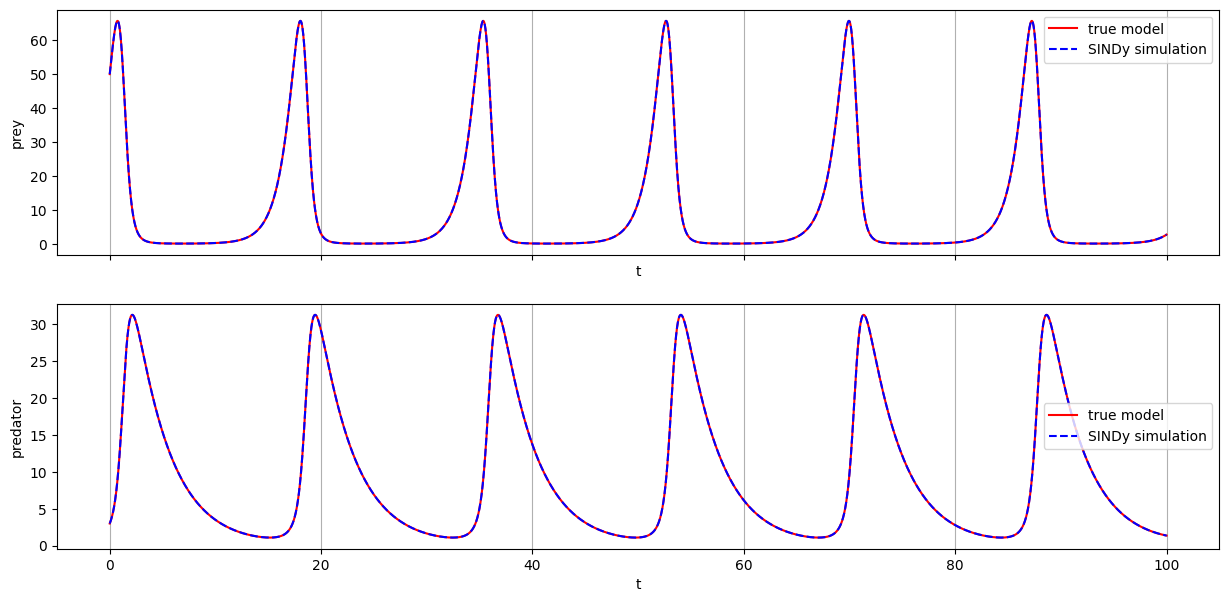

In [5]:
#Runge-Kutta integartion
rk_integrator_args = {}
rk_integrator_args['rtol'] = 1e-10
rk_integrator_args['method'] = 'RK45'
rk_integrator_args['atol'] = 1e-10

run_sindy(rk_integrator_args, inital_populations, test_initial_populations)